# Spam Classification

link to the DataSet: https://www.kaggle.com/chandramoulinaidu/spam-classification-for-basic-nlp

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns

In [107]:
data = pd.read_csv('Data/SpamEmailrawtextforNLP.csv')

In [108]:
data.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
CATEGORY     5796 non-null int64
MESSAGE      5796 non-null object
FILE_NAME    5796 non-null object
dtypes: int64(1), object(2)
memory usage: 135.9+ KB


# Data Preprocessing 

In [110]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.3


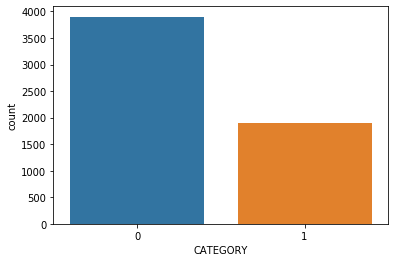

In [111]:
sns.countplot(df['CATEGORY'])

In [112]:
#Let's drop the FILE_NAME from data set
df = data.drop(columns='FILE_NAME')

In [113]:
"""def preprocess(df):
    X = df['MESSAGE']
    y = df['CATEGORY']
    
    X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    
    
    return X_train, y_train, X_test, y_test"""

"def preprocess(df):\n    X = df['MESSAGE']\n    y = df['CATEGORY']\n    \n    X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)\n    \n    \n    return X_train, y_train, X_test, y_test"

In [114]:
import tensorflow_hub as hub
print("Hub version: ", hub.__version__)

Hub version:  0.12.0


In [115]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)


In [116]:
# The entire model 

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_4 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [122]:
X = data['MESSAGE']
y = data['CATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [123]:
"""x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]"""

'x_val = X_train[:10000]\npartial_x_train = X_train[10000:]\n\ny_val = y_train[:10000]\npartial_y_train = y_train[10000:]'

In [124]:
print(len(X_train))

print(len(y_train))

4057
4057


In [126]:
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/40
8/8 [==============================] - 8s 950ms/step - loss: 0.5687 - accuracy: 0.7032 - val_loss: 0.5362 - val_accuracy: 0.7418
Epoch 2/40
8/8 [==============================] - 7s 898ms/step - loss: 0.5028 - accuracy: 0.7584 - val_loss: 0.4748 - val_accuracy: 0.7959
Epoch 3/40
8/8 [==============================] - 7s 915ms/step - loss: 0.4378 - accuracy: 0.8243 - val_loss: 0.4155 - val_accuracy: 0.8585
Epoch 4/40
8/8 [==============================] - 7s 858ms/step - loss: 0.3767 - accuracy: 0.8888 - val_loss: 0.3596 - val_accuracy: 0.9034
Epoch 5/40
8/8 [==============================] - 10s 1s/step - loss: 0.3188 - accuracy: 0.9362 - val_loss: 0.3072 - val_accuracy: 0.9379
Epoch 6/40
8/8 [==============================] - 9s 1s/step - loss: 0.2656 - accuracy: 0.9603 - val_loss: 0.2617 - val_accuracy: 0.9528
Epoch 7/40
8/8 [==============================] - 11s 1s/step - loss: 0.2190 - accuracy: 0.9739 - val_loss: 0.2223 - val_accuracy: 0.9678
Epoch 8/40
8/8 [===========

In [127]:
results = model.evaluate(X_test, y_test)

print(results)

55/55 [==============================] - 8s 153ms/step - loss: 0.0555 - accuracy: 0.9868
[0.05549134686589241, 0.9867740273475647]


In [130]:
sample = "Hi anas,Do you have a graph story to share Want to inspire others to new heights graph technology Submit your presentation proposal GraphConnect"
predictions = model.predict(sample)

IndexError: list index out of range